### Read data from pkl file

In [1]:
import pickle
import os

data = pickle.load(open('./data/test_final.pkl', 'rb'))
path_to_lidar_data = './data/test_final'
lidar_data_dir = os.listdir(path=path_to_lidar_data)

### Select a random time index from pkl file

In [2]:
import random

rand_idx = random.randint(0, len(lidar_data_dir))

In [3]:
future_joystick = data['future_joystick']
odom = data['odom']

### Get one sample of data

In [4]:
from PIL import Image
import numpy as np

joystick_sample = future_joystick[rand_idx]
lidar_sample = np.asarray(Image.open(os.path.join(path_to_lidar_data, f'{rand_idx}.png')))
data_sample = (joystick_sample, lidar_sample)

### View Joystick Sample

In [5]:
import pandas as pd

joystick_sample_df = pd.DataFrame(data=joystick_sample, columns=['linear_x', 'linear_y', 'angular_z'])
joystick_sample_df

,linear_x,linear_y,angular_z
0,1.600000,0.000000,-0.000000
1,1.600000,0.000000,-0.000000
2,1.600000,0.000000,-0.000000
3,1.600000,0.000000,-0.000000
4,1.600000,0.000000,-0.000000
...,...,...,...
295,1.554858,-0.109302,-0.074496
296,1.554858,-0.109302,-0.086912
297,1.554858,-0.109302,-0.086912
298,1.554858,-0.109302,-0.086912


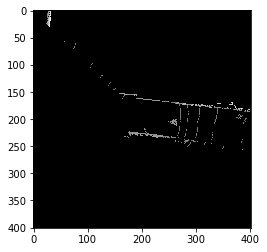

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(lidar_sample, cmap='gray')